The different leaders at Airbnb want to understand some important insights based on various attributes in the data set so as to increase the revenue:

Which type of hosts to acquire more and where?
The categorisation of customers based on their preferences. This includes the following:
The neighbourhoods they need to target.
The pricing ranges preferred by customers.
The various kinds of properties that exist w.r.t. customer preferences.
Adjustments in the existing properties to make it more customer-oriented.
What are the most popular localities and properties in New York currently?
How to get unpopular properties more traction?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### BEFORE WE START VISUALIZING AND UNDERSTANDING , WE MUST CLEAN THE DATA

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Since name and host_names are the one of the important categories in the data . Its better to get rid of the null data present in that category

In [7]:
df = df[~df.name.isnull()]

In [8]:
df[df.host_name.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,08-07-2019,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,02-01-2017,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,23-05-2019,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,20-10-2015,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,19-06-2019,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,01-07-2015,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,19-06-2019,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,01-08-2015,0.02,1,0


In [9]:
df = df[~df.host_name.isnull()]

Lets look at the data now

In [10]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Looking at the datframe we can tell that no.of reviews per month is an important factor for the AIRBNBs thus having null values on them may factorize our data in a wrong way

In [12]:
df = df[~df.reviews_per_month.isnull()]

In [13]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
df.shape

(38821, 16)

NOW THAT OUR DATA IS CLEAN LETSS START TO VISUALIZE AND FACTORIZE OUR DATA

<AxesSubplot:>

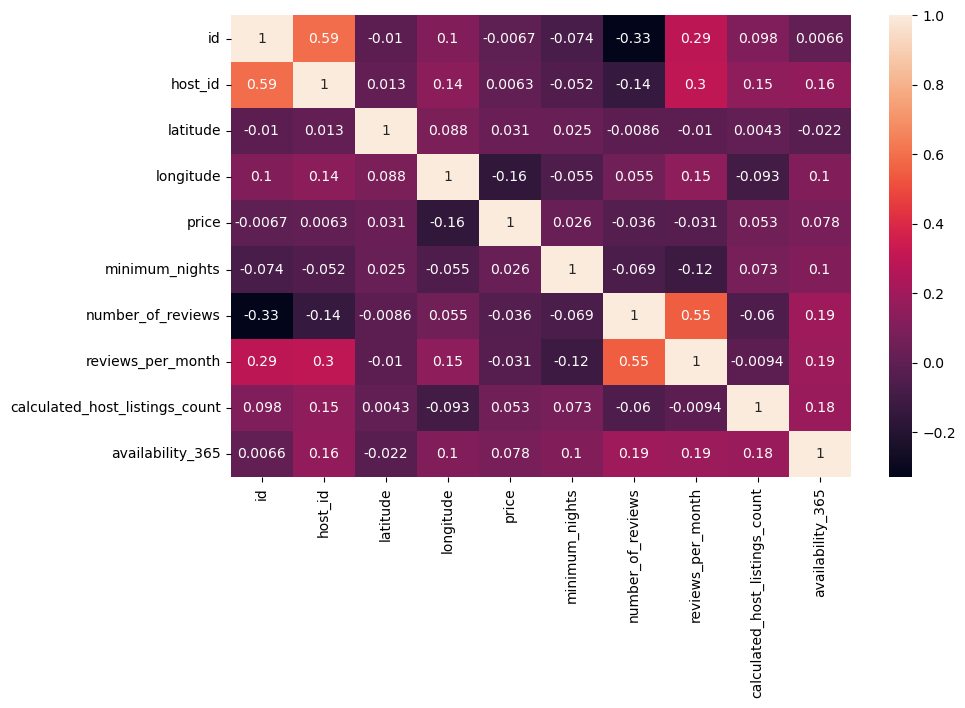

In [15]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [16]:
df.name.value_counts()

Home away from home                        12
Loft Suite @ The Box House Hotel           11
Private Room                               10
#NAME?                                     10
Brooklyn Apartment                          9
                                           ..
Sunny light filled comfy bedroom            1
Astoria living, like a true NY'er           1
Sunny light filled bedroom                  1
Magical 1 BR in Crown Heights               1
Cozy Private Room in Bushwick, Brooklyn     1
Name: name, Length: 38244, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

In [18]:
df1 = df.set_index(['neighbourhood_group' , 'neighbourhood'])
df1 = df1.sort_values(by='number_of_reviews' , ascending = False)
df1

id  \
neighbourhood_group neighbourhood                   
Queens              Jamaica               9145202   
Manhattan           Harlem                 903972   
                    Harlem                 903947   
                    Harlem                 891117   
Queens              Jamaica              10101135   
...                                           ...   
Manhattan           Battery Park City    28329243   
                    Harlem                7428365   
Queens              Springfield Gardens   7433174   
Manhattan           Murray Hill           7434420   
Brooklyn            Bushwick             36455809   

                                                                                      name  \
neighbourhood_group neighbourhood                                                            
Queens              Jamaica                                        Room near JFK Queen Bed   
Manhattan           Harlem                                      Great Bedroom in Manhattan   
                    Harlem                                  Beautiful Bedroom in Manhattan   
                    Harlem                                    Private Bedroom in Manhattan   
Queens              Jamaica                                        Room Near JFK Twin Beds   
...                                                                                    ...   
Manhattan           Battery Park City    Attractive FiDi 1BR w/ Office nook + Gym, Door...   
                    Harlem               City retrieve1 -large bedroom, comfortable / q...   
Queens              Springfield Gardens   Apt.-private entrance -Townhouse- 10mins. to JFK   
Manhattan           Murray Hill                              Steps Away From Grand Central   
Brooklyn            Bushwick                       Cozy Private Room in Bushwick, Brooklyn   

                                           host_id   host_name  latitude  \
neighbourhood_group neighbourhood                                          
Queens              Jamaica               47621202        Dona  40.66730   
Manhattan           Harlem                 4734398          Jj  40.82085   
                    Harlem                 4734398          Jj  40.82124   
                    Harlem                 4734398          Jj  40.82264   
Queens              Jamaica               47621202        Dona  40.66939   
...                                            ...         ...       ...   
Manhattan           Battery Park City    107434423  Blueground  40.70438   
                    Harlem                 3542562        Jana  40.82622   
Queens              Springfield Gardens   34789416        Carl  40.67205   
Manhattan           Murray Hill           38943127      Tricia  40.74981   
Brooklyn            Bushwick              74162901   Christine  40.69805   

                                         longitude        room_type  price  \
neighbourhood_group neighbourhood                                            
Queens              Jamaica              -73.76831     Private room     47   
Manhattan           Harlem               -73.94025     Private room     49   
                    Harlem               -73.93838     Private room     49   
                    Harlem               -73.94041     Private room     49   
Queens              Jamaica              -73.76975     Private room     47   
...                                            ...              ...    ...   
Manhattan           Battery Park City    -74.01708  Entire home/apt    263   
                    Harlem               -73.94980     Private room     69   
Queens              Springfield Gardens  -73.75343     Private room    109   
Manhattan           Murray Hill          -73.97860  Entire home/apt    198   
Brooklyn            Bushwick             -73.92801     Private room     30   

                                         minimum_nights  number_of_reviews  \
neighbourhood_group neighbourhood                   

In [39]:
df1.drop_duplicates()

In [47]:
top_10_neighbourhood = df1.head(20)
top_10_neighbourhood

,neighbourhood,number_of_reviews
11759,Jamaica,629
2031,Harlem,607
2030,Harlem,597
2015,Harlem,594
13495,Jamaica,576
10623,East Elmhurst,543
1879,Lower East Side,540
20403,East Elmhurst,510
4870,Park Slope,488
471,Bushwick,480


<AxesSubplot:>

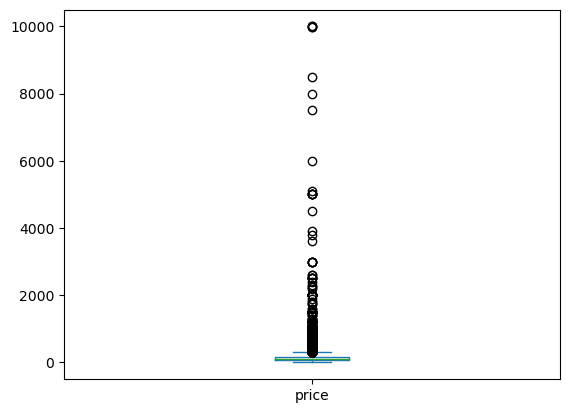

In [14]:
df.price.plot.box()

Hving values over 4000 seems a bit too unrealistic and expensive But just to confirm lets look at the data further

In [15]:
df[df.price > 4000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,28-09-2013,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,17-02-2015,0.27,1,359
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,02-01-2016,0.16,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,29-12-2018,0.09,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,15-09-2016,0.03,11,365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,02-01-2015,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,13-02-2016,0.04,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,01-01-2016,0.14,1,83
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,27-07-2017,0.16,1,0
25825,20654227,Fulton 2,100069033,Sarah-2,Brooklyn,Cypress Hills,40.68185,-73.88128,Entire home/apt,5000,2,4,03-01-2018,0.18,1,0


From the above data we can see that the host_listing_count is less for values and the reviews per month seems a bit too less..there are possibilities of these rooms existing but just for our case study lets ignore these columns

In [16]:
df = df[df.price < 4000]

<AxesSubplot:>

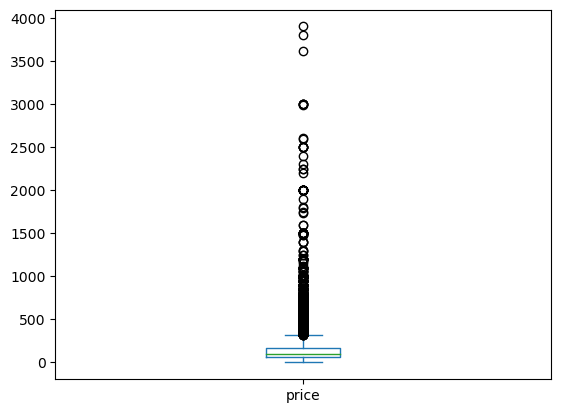

In [22]:
df.price.plot.box()

In [27]:
df = df[df.price < 2600]

<AxesSubplot:>

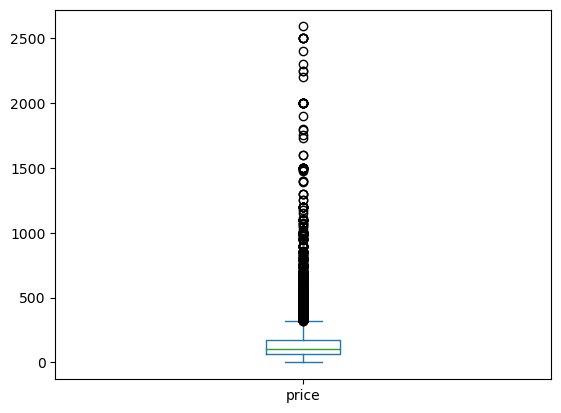

In [28]:
df.price.plot.box()

In [29]:
df.shape

(38797, 16)

In [33]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.879700e+04,3.879700e+04,38797.000000,38797.000000,38797.000000,38797.000000,38797.000000,38797.000000,38797.000000,38797.000000
mean,1.810071e+07,6.424128e+07,40.728125,-73.951144,138.979689,5.861639,29.304070,1.373587,5.168054,114.823105
std,1.069306e+07,7.589291e+07,0.054998,0.046690,129.385696,17.378608,48.193431,1.680407,26.310856,129.498642
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.722224e+06,7.033916e+06,40.688640,-73.982450,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887250e+07,2.837193e+07,40.721690,-73.954790,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756600e+07,1.018839e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,2590.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [35]:
df[['name' , 'host_name']].value_counts()

name                                               host_name          
Loft Suite @ The Box House Hotel                   The Box House Hotel    11
Hillside Hotel                                     Hillside Hotel          7
#NAME?                                             John                    7
Luminous Modern Apt Share for Young Professionals  Ollie                   4
Loft Suite @ Box House Hotel                       The Box House Hotel     4
                                                                          ..
Cozy and close to Manhattan                        Vytaute                 1
Cozy and comfortable apart                         Nany                    1
Cozy and comfortable bedroom in Astoria, Queens    Jorge                   1
Cozy and comfortable studio in Clinton Hill.       Max                     1
ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2                            Hiro                    1
Length: 38665, dtype: int64

In [36]:
import seaborn as sns

C:\Users\97450\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


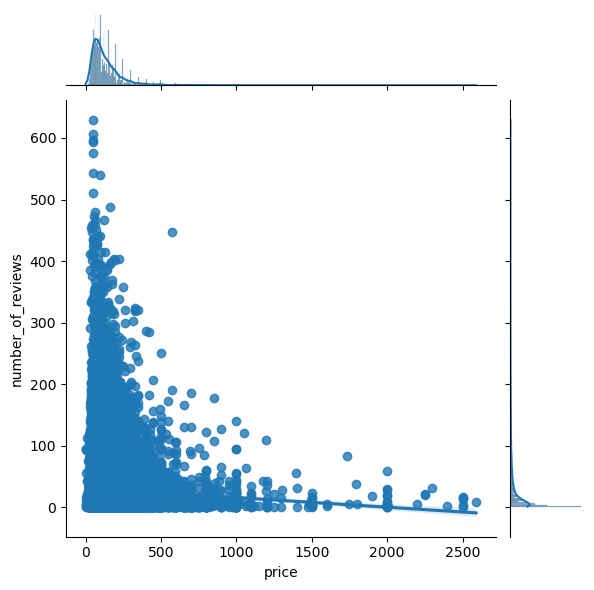

In [38]:
sns.jointplot(df.number_ , df.number_of_reviews , kind = 'reg')

FROM THE ABOVE PLOT we can visualize the variations of Rating w.r to price i.e theres than an high amount of rating on avg for 
price range around 500-1000 compared to higher prices and reviews staying between 0-100 for prices higher than 1000

C:\Users\97450\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


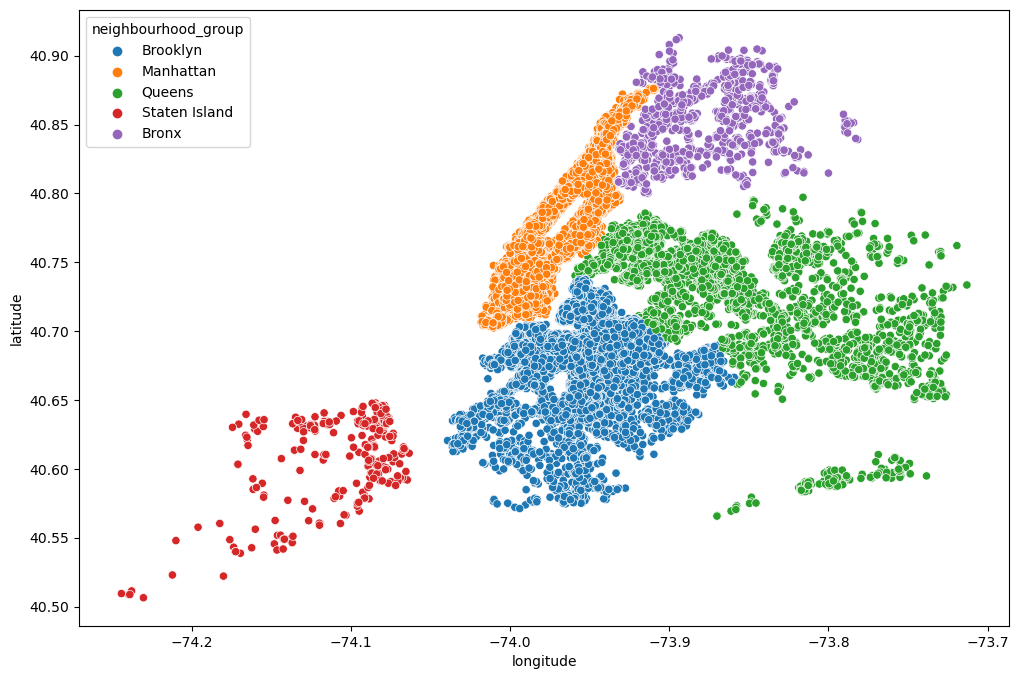

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['longitude'],df['latitude'],hue=df['neighbourhood_group']);

C:\Users\97450\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


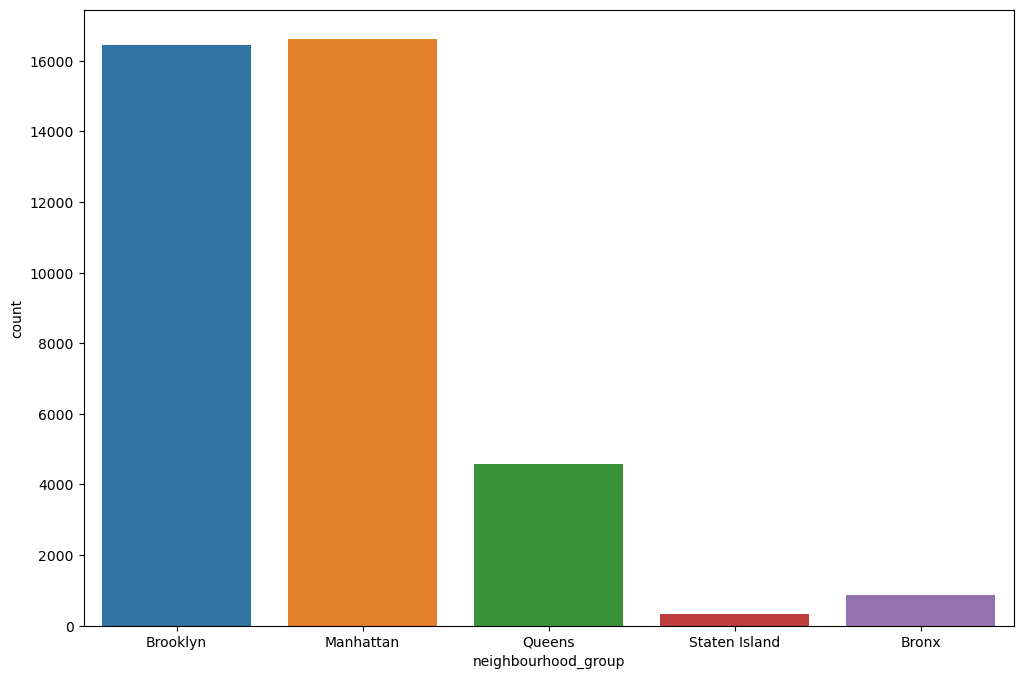

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(df['neighbourhood_group']);